In [1]:
import numpy as np
import pandas as pd
import cmdstanpy
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import InsetPosition
import matplotlib

In [2]:
draws = 50

mick_ht = 'CTCCCCCTCTTTCCTTCCCCCCTTCTCTCTTCTCCTCTCCTTCCTTTCCC'
brescia_ht = 'TCTTTTCCTCTCCCTTCTTTTCCTCTCTTCCTCTTCTTTCTCTCCTCTCT'
nick_df = pd.read_excel('Cartel1.xlsx')


In [3]:
nick_ht = ''
for i in range(len(nick_df)):
    if nick_df['testa'][i] == 'x':
        nick_ht += 'T'
    else:
        nick_ht += 'C'


In [4]:
#simulated_ht = np.random.choice(['T', 'C'], size=draws, p=[0.5, 0.5])
#simulated_ht = ''.join(simulated_ht)
simulated_ht = 'CCCCCTTCTCTTCCTCCTCTTTCTCTCCCTTTCTCCCCTTCCCTCCCTTT'

In [5]:
mapping_tc = {'T': 1, 'C': 0}

(-2.45, 51.45, 0.2125, 1.0375)

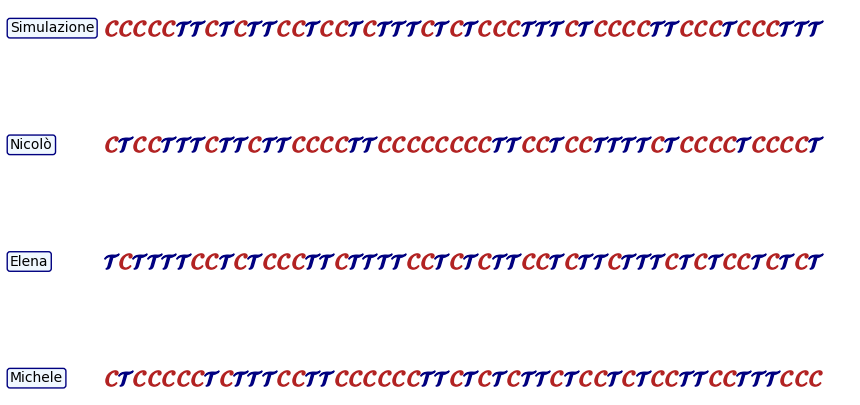

In [6]:
all_draws = [mick_ht, brescia_ht, nick_ht, simulated_ht]
names = ['Michele', 'Elena', 'Nicolò', 'Simulazione']

fig, ax = plt.subplots(figsize=(10, 5))
for i, draw in enumerate(all_draws):
    tosses_T = [i for i, x in enumerate(draw) if x == 'T']
    tosses_C = [i for i, x in enumerate(draw) if x == 'C']

    ax.text(-7, (1 /4) * (i + 1) - 0.01, names[i],\
         bbox=dict(facecolor='aliceblue', edgecolor='navy', boxstyle='round,pad=0.2'))

    ax.scatter(tosses_T, [(1 /4) * (i + 1)]* len(tosses_T),\
         marker = '$\mathcal{T}$',color='navy', s = 120)
    ax.scatter(tosses_C, [(1 /4) * (i + 1)]* len(tosses_C),\
         marker = '$\mathcal{C}$',color='firebrick', s = 120)

ax.axis('off')
#tosses_C = [i for i, x in enumerate(shooting_prone) if x == 1]

In [7]:
tmp = 'HTHHHTHTTHHTTTTTTTTHHHTTTHHTTTTHHTTHHHTTHTHTTTTTTHTHTTTTHHHHTHTHTTHTTTHTTHTTTTHTHHTHHHHTTTTTHHHHTHHHTTTTHTHTTHHHHTHHHHHHHHTTHHTHHTHHHHHHHTTHTHTTTHHTTTTHTHHTTHTTHTHTHTTHHHHHTTHTTTHTHTHHTTTTHTTTTTHHTHTHHHHTTTTHTHHHTHHTHTHTHTHHHTHTTHHHTHHHHHHTHHHTHTTTHHHTTTHHTHTTHHTHHHTHTTHTTHTTTHHTHTHTTTTHTHTHTTHTHTHT'
table_dict_mick = {'C': {'C':0, 'T':0}, 'T':{'C':0, 'T':0}}
table_dict_brescia = {'C': {'C':0, 'T':0}, 'T':{'C':0, 'T':0}}
table_dict_chiari = {'C': {'C':0, 'T':0}, 'T':{'C':0, 'T':0}}
table_dict_simulated = {'C': {'C':0, 'T':0}, 'T':{'C':0, 'T':0}}

for i in range(draws-1):
    for dic, sim in zip([table_dict_mick, table_dict_brescia, table_dict_chiari, table_dict_simulated],\
                      [mick_ht, brescia_ht, nick_ht, simulated_ht]):
        dic[sim[i]][sim[i+1]] += 1



In [8]:
print(table_dict_mick, table_dict_brescia, table_dict_chiari, table_dict_simulated, sep='\n')

{'C': {'C': 15, 'T': 13}, 'T': {'C': 13, 'T': 8}}
{'C': {'C': 6, 'T': 16}, 'T': {'C': 16, 'T': 11}}
{'C': {'C': 19, 'T': 11}, 'T': {'C': 10, 'T': 9}}
{'C': {'C': 15, 'T': 13}, 'T': {'C': 12, 'T': 9}}


In [9]:
shooting_total = [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,\
    0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,\
        0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,\
            0, 1, 0, 0, 0, 1, 1, 1, 1, 1,\
                0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,\
                    1, 0, 0, 1, 0, 1, 1, 0, 0, 1,\
                        1, 1, 1, 1, 0, 1, 1, 1, 1, 1,\
                            1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,\
                                1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,\
                                    1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,\
                                        0, 1, 1, 1, 1, 1, 1, 1, 1, 1,\
                                            1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,\
                                                0, 0, 1, 1, 1, 1, 1, 1, 1, 1,\
                                                     1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1]
shooting_standing = [0, 1, 0, 1, 0, 1, 1, 0, 1, 0,\
    1, 1, 1, 1, 0, 1, 0, 1, 1, 1,\
        1, 1, 1, 0, 1, 1, 1, 1, 1, 1,\
            1, 1, 1, 1, 1,\
                1, 1, 1, 1, 1, 1, 1, 0, 1, 1,\
                    1, 1, 0, 0, 1,\
                        1, 1, 1, 1, 1,\
                            1, 1, 1, 1, 0, 1, 1, 1, 1, 1,\
                                1, 0, 1, 1, 0, 1, 1, 1, 1, 1,\
                                    1, 1, 1, 1, 1, 1, 1, 1, 1, 1,\
                                        1, 1, 1, 1, 1,\
                                            1, 1, 1, 1, 1, 1, 1, 1, 0, 1,\
                                                1, 1, 1, 1, 1,\
                                                    1, 1, 1, 1, 1, 1, 1, 0, 1, 1]
shooting_prone = [0, 0, 0, 0, 0, 1, 1, 1, 0, 0,\
    0, 0, 0, 0, 0, 0, 1, 0, 1, 1,\
        0, 0, 0, 0, 0, 1, 1, 0, 0, 1,\
            0, 1, 0, 0, 0,\
                0, 1, 1, 1, 1, 1, 0, 0, 1, 1,\
                    1, 0, 0, 1, 0,\
                         1, 1, 1, 1, 0,\
                            1, 0, 0, 0, 0, 1, 1, 1, 1, 1,\
                                1, 0, 1, 1, 1, 1, 0, 1, 1, 0,\
                                    1, 1, 0, 1, 1, 1, 1, 1, 1, 1,\
                                        0, 1, 1, 1, 1,\
                                            1, 1, 1, 1, 1, 1, 1, 1, 1, 1,\
                                                0, 0, 1, 1, 1,\
                                                    1, 1, 1, 0, 1, 1, 1, 1, 1, 1]

In [10]:
np.sum(shooting_total[150:])/len(shooting_total[150:])

0.9135802469135802

In [11]:
shooting_prone_x = [i for i, x in enumerate(shooting_prone) if x == 0]
shooting_prone_o = [i for i, x in enumerate(shooting_prone) if x == 1]

shooting_standing_x = [i for i, x in enumerate(shooting_standing) if x == 0]
shooting_standing_o = [i for i, x in enumerate(shooting_standing) if x == 1]


In [16]:
im = plt.imread('../../../../Desktop/prone.png')
im_stand = plt.imread('../../../../Desktop/standing.png')

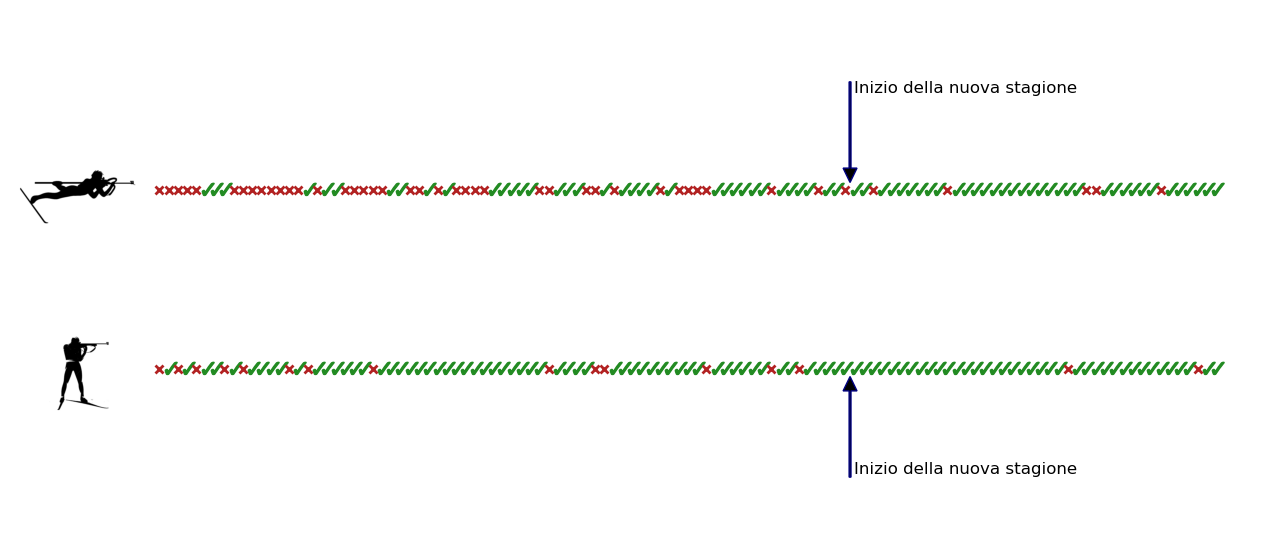

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(15, 7))
ax.plot(shooting_prone_x, [0.5]* len(shooting_prone_x), marker = 'x', color='firebrick',\
    markeredgewidth=2, ls = '' )
ax.scatter(shooting_prone_o, [0.5]* len(shooting_prone_o), marker = '$\checkmark$',color='forestgreen',\
     s = 120)
ax.plot(shooting_standing_x, [0.25]* len(shooting_standing_x), marker = 'x', color='firebrick',\
    markeredgewidth=2, ls = '' )
ax.scatter(shooting_standing_o, [0.25]* len(shooting_standing_o), marker = '$\checkmark$',color='forestgreen',\
     s = 120)     
ax.set_ylim(0, 0.75)
#ax.axvline(74.5, color = 'black', ls = '--', linewidth = 1.5, label = "Inizionio della nuova stagione")
left, bottom, width, height = -0.1 , 0.25, 0.15, 0.15
ip = InsetPosition(ax, [left, bottom, width, height])

new_ax1 = fig.add_axes([0.1, 0.1, 0.1, 0.1], zorder = 4)
new_ax1.imshow(im_stand)
new_ax1.set_axes_locator(ip)
new_ax1.axis('off')

left, bottom, width, height = -0.1 , 0.58, 0.15, 0.15
ip = InsetPosition(ax, [left, bottom, width, height])

new_ax1 = fig.add_axes([0.1, 0.1, 0.1, 0.1], zorder = 4)
new_ax1.imshow(im)
new_ax1.set_axes_locator(ip)
new_ax1.axis('off')
ax.arrow(74.5, 0.1, 0, 0.14,  ec = 'navy', length_includes_head = True, head_width = 1.5,  
 head_length = 0.02, zorder = 5, width = 0.2, color = 'black')

ax.arrow(74.5, 0.65, 0, -0.14,  ec = 'navy', length_includes_head = True, head_width = 1.5,  
 head_length = 0.02, zorder = 5, width = 0.2, color = 'black')

ax.text(87, 0.1, 'Inizio della nuova stagione', color = 'black', fontsize = 12, ha = 'center',\
     va = 'bottom', zorder = 6)

ax.text(87, 0.63, 'Inizio della nuova stagione', color = 'black', fontsize = 12, ha = 'center',\
     va = 'bottom', zorder = 6)
ax.axis('off')
fig.savefig('../../../../Desktop/shooting.png', dpi = 300, bbox_inches = 'tight')
plt.show()


In [15]:
def norm_entropy(sequence):
    N = len(sequence)
    n = np.sum(sequence)
    sequence += [1]
    indeces = [i for i, x in enumerate(sequence) if x == 1]
    indeces_entr = np.array(indeces) + 1

    x_i_values = np.diff(indeces_entr) / (N + 1)

    x_i_values = np.array([indeces_entr[0] / (N + 1)] + list(x_i_values))
    
    H = 1 + np.sum(x_i_values * np.log2(x_i_values)) / (np.log2(n+ 1))

    return H


In [16]:
norm_entropy_prone = np.array([norm_entropy(shooting_prone[:i + 1]) for i in range(len(shooting_prone))])
norm_entropy_prone = np.nan_to_num(norm_entropy_prone, neginf = 0)
norm_entropy_prone_2022 = np.array([norm_entropy(shooting_prone[75:i + 1])\
      for i in range(75, len(shooting_prone))])
norm_entropy_prone_2022 = np.nan_to_num(norm_entropy_prone_2022, neginf = 0)
norm_entropy_prone_2021 = np.array([norm_entropy(shooting_prone[:i + 1])\
      for i in range(len(shooting_prone[:75]))])
norm_entropy_prone_2021 = np.nan_to_num(norm_entropy_prone_2021, neginf = 0)
norm_entropy_total = np.array([norm_entropy(shooting_total[:i + 1]) for i in range(len(shooting_total))])
norm_entropy_total = np.nan_to_num(norm_entropy_total, neginf = 0)


norm_entropy_standing = np.array([norm_entropy(shooting_standing[:i + 1])\
      for i in range(len(shooting_standing))])
norm_entropy_standing = np.nan_to_num(norm_entropy_standing, neginf = 0)
norm_entropy_standing_2022 = np.array([norm_entropy(shooting_standing[75:i + 1])\
     for i in range(75, len(shooting_standing))])
norm_entropy_standing_2022 = np.nan_to_num(norm_entropy_standing_2022, neginf = 0)

/var/folders/92/pt64shtn3fx70tf0m4ng91240000gn/T/ipykernel_3101/3429785154.py:12: RuntimeWarning: invalid value encountered in double_scalars
  H = 1 + np.sum(x_i_values * np.log2(x_i_values)) / (np.log2(n+ 1))


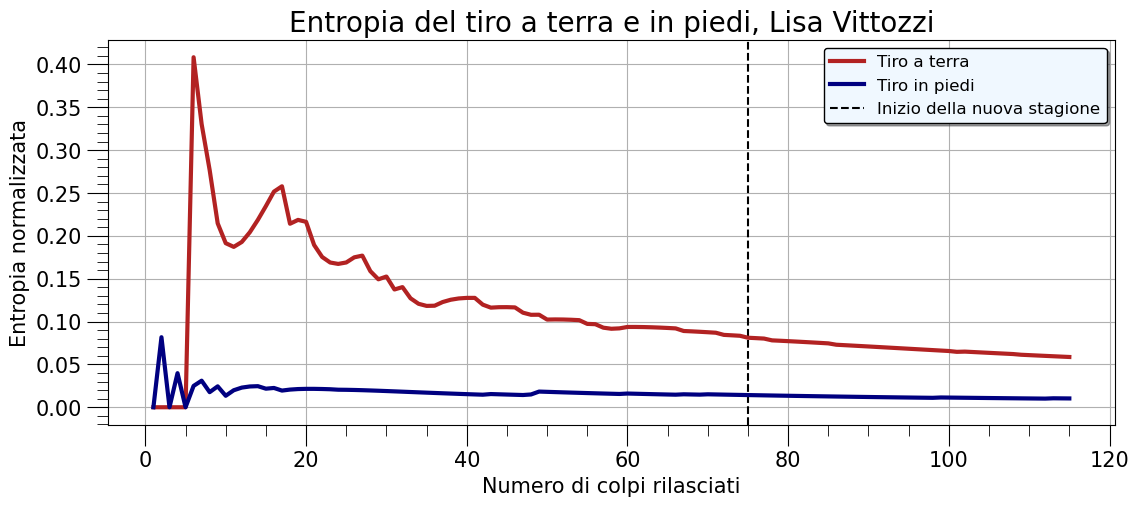

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(13, 5))

ax.plot(range(1, len(norm_entropy_prone) + 1), norm_entropy_prone, color = 'firebrick',\
     label = 'Tiro a terra', linewidth = 3, zorder = 3)
ax.plot(range(1, len(norm_entropy_standing) + 1), norm_entropy_standing, color = 'navy',\
     label = 'Tiro in piedi', linewidth = 3, zorder = 3)
ax.axvline(75, color = 'black', ls = '--', linewidth = 1.5, label = "Inizio della nuova stagione",\
     zorder = 2)
ax.grid(True, zorder = 1)
ax.legend(facecolor = 'aliceblue', fontsize = 12, shadow = True, edgecolor = 'black')

ax.tick_params(axis='both', which='major', labelsize=15, length=15)
ax.tick_params(axis='both', which='minor', labelsize=15, length=8)
ax.minorticks_on()
ax.set_ylabel('Entropia normalizzata', fontsize = 15)
ax.set_xlabel('Numero di colpi rilasciati', fontsize = 15)
ax.set_title('Entropia del tiro a terra e in piedi, Lisa Vittozzi', fontsize = 20)
plt.show()

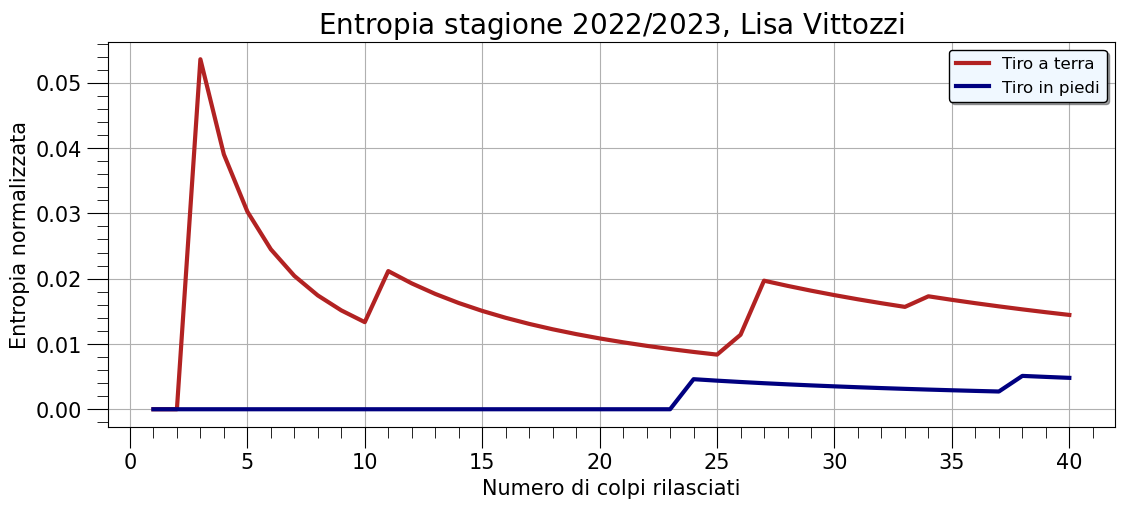

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(13, 5))

ax.plot(range(1, len(norm_entropy_prone_2022) + 1), norm_entropy_prone_2022, color = 'firebrick',\
     label = 'Tiro a terra', linewidth = 3, zorder = 3)
ax.plot(range(1, len(norm_entropy_standing_2022) + 1), norm_entropy_standing_2022, color = 'navy',\
     label = 'Tiro in piedi', linewidth = 3, zorder = 3)
#ax.axvline(75, color = 'black', ls = '--', linewidth = 1.5, label = "Inizio della nuova stagione",\
 #    zorder = 2)
ax.grid(True, zorder = 1)
ax.legend(facecolor = 'aliceblue', fontsize = 12, shadow = True, edgecolor = 'black')

ax.tick_params(axis='both', which='major', labelsize=15, length=15)
ax.tick_params(axis='both', which='minor', labelsize=15, length=8)
ax.minorticks_on()
ax.set_ylabel('Entropia normalizzata', fontsize = 15)
ax.set_xlabel('Numero di colpi rilasciati', fontsize = 15)
ax.set_title('Entropia stagione $2022/2023$, Lisa Vittozzi', fontsize = 20)
plt.show()

In [19]:
prob_prone = np.sum(shooting_prone) / len(shooting_prone)
all_simulated = [list(np.random.choice([0, 1], p=[1 - prob_prone, prob_prone],\
     size = len(shooting_prone))) for _ in range(40000)]
all_entropies = list(map(norm_entropy, all_simulated))


prob_standing = np.sum(shooting_standing) / len(shooting_standing)
all_simulated_ = [list(np.random.choice([0, 1], p=[1 - prob_standing, prob_standing],\
     size = len(norm_entropy_standing))) for _ in range(10000)]
all_entropies_ = list(map(norm_entropy, all_simulated_))


prob_prone_2022 = np.sum(shooting_prone[75:]) / len(shooting_prone[75:])
all_simulated_2022 = [list(np.random.choice([0, 1], p=[1 - prob_prone_2022, prob_prone_2022],\
     size = len(shooting_prone[75:]))) for _ in range(40000)]
all_entropies_2022 = list(map(norm_entropy, all_simulated_2022))

prob_standing_2022 = np.sum(shooting_standing[75:]) / len(shooting_standing[75:])
all_simulated_2022_ = [list(np.random.choice([0, 1], p=[1 - prob_standing_2022, prob_standing_2022],\
     size = len(shooting_standing[75:]))) for _ in range(10000)]
all_entropies_2022_ = list(map(norm_entropy, all_simulated_2022_))

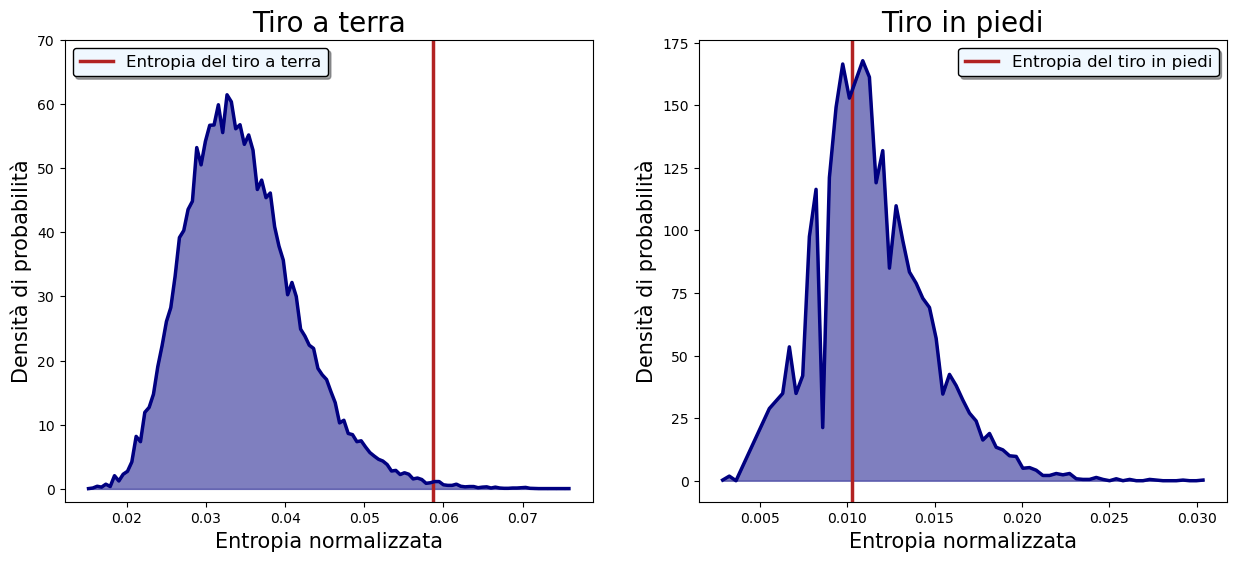

In [26]:
fig, ax_ = plt.subplots(1, 2, figsize=(15, 6))
ax, ax1 = ax_
ax.axvline(norm_entropy_prone[-1], color = 'firebrick', linewidth = 2.5, label = 'Entropia del tiro a terra')
counts_prone, edges_prone = np.histogram(all_entropies, bins='fd', density=True)
bin_centers_prone = 0.5 * (edges_prone[1:] + edges_prone[:-1])
hp = np.sum((counts_prone * np.diff(edges_prone)[0])[bin_centers_prone > norm_entropy_prone[-1]])
ax.plot(bin_centers_prone[counts_prone > 0], counts_prone[counts_prone > 0], color = 'navy', linewidth = 2.5)
ax.fill_between(bin_centers_prone, counts_prone, color = 'navy', alpha = 0.5)

ax1.axvline(norm_entropy_standing[-1], color = 'firebrick', linewidth = 2.5, label = 'Entropia del tiro in piedi')
counts, edges = np.histogram(all_entropies_, density=True, bins = 'fd')
bin_centers = 0.5 * (edges[1:] + edges[:-1])
hp_standing = np.sum((counts * np.diff(edges)[0])[bin_centers > norm_entropy_standing[-1]])
ax1.plot(bin_centers[(counts > 20 )|( bin_centers < 0.004 ) | (bin_centers > 0.014)],\
     counts[(counts > 20 )|( bin_centers < 0.004 ) | (bin_centers > 0.014)], color = 'navy', linewidth = 2.5)
ax1.fill_between(bin_centers[(counts > 20 )|( bin_centers < 0.004 ) | (bin_centers > 0.014)],\
      counts[(counts > 20 )|( bin_centers < 0.004 ) | (bin_centers > 0.014)], color = 'navy', alpha = 0.5)


ax.legend(facecolor = 'aliceblue', fontsize = 12, shadow = True, edgecolor = 'black', loc = 'upper left')
ax1.legend(facecolor = 'aliceblue', fontsize = 12, shadow = True, edgecolor = 'black', loc = 'upper right')
ax.set_xlabel('Entropia normalizzata', fontsize = 15)
ax1.set_xlabel('Entropia normalizzata', fontsize = 15)
ax.set_ylabel('Densità di probabilità', fontsize = 15)
ax1.set_ylabel('Densità di probabilità', fontsize = 15)
ax.set_title('Tiro a terra', fontsize = 20)
ax1.set_title('Tiro in piedi', fontsize = 20)
ax.set_ylim(-2, 70)
plt.show()

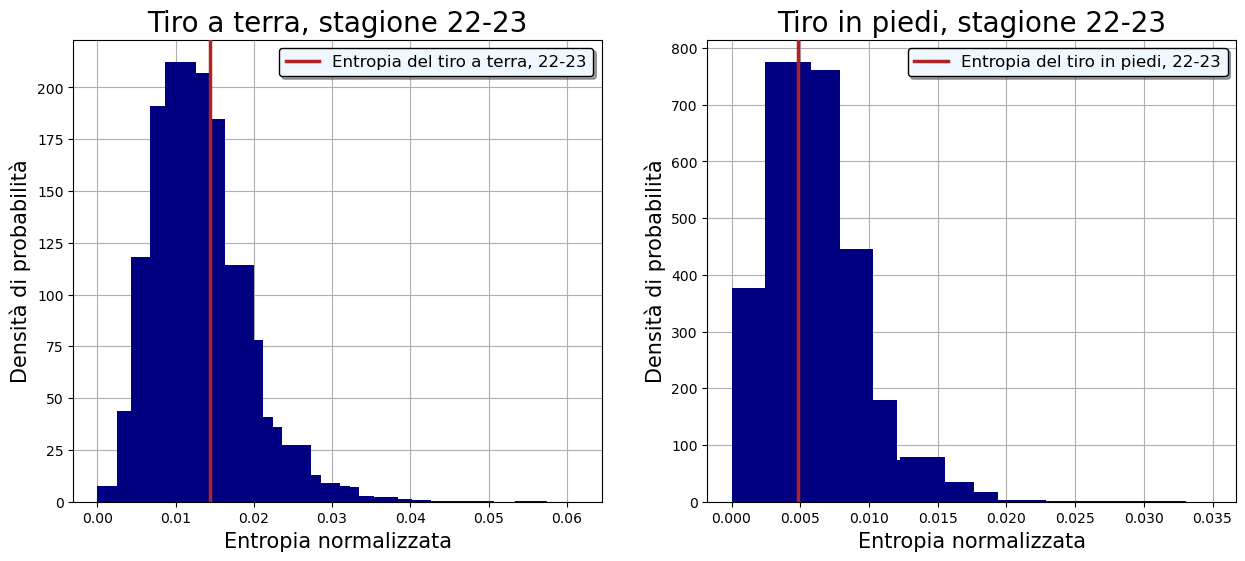

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
ax_, ax1 = ax
ax_.axvline(norm_entropy_prone_2022[-1], color = 'firebrick', linewidth = 2.5, zorder =3, label = 'Entropia del tiro a terra, 22-23')
counts_prone, edges_prone, _ = ax_.hist(all_entropies_2022, density=True, bins = 100, width = 0.02/5,\
    color = 'navy', alpha = 1, zorder = 2)
bin_centers_prone = 0.5 * (edges_prone[1:] + edges_prone[:-1])
hp = np.sum((counts_prone * np.diff(edges_prone)[0])[bin_centers_prone > norm_entropy_prone_2022[-1]])
ax_.grid(zorder = 1)
#ax_.plot(bin_centers_prone[counts_prone > 70], counts_prone[counts_prone > 70], color = 'navy', linewidth = 2.5)
#ax_.plot(bin_centers_prone, counts_prone, color = 'navy', linewidth = 2.5)
ax_.legend(facecolor = 'aliceblue', fontsize = 12, shadow = True, edgecolor = 'black', loc = 'best')
ax_.set_xlabel('Entropia normalizzata', fontsize = 15)
ax_.set_ylabel('Densità di probabilità', fontsize = 15)
ax_.set_title('Tiro a terra, stagione 22-23', fontsize = 20)

ax1.axvline(norm_entropy_standing_2022[-1], color = 'firebrick', linewidth = 2.5, zorder = 3, label = 'Entropia del tiro in piedi,\
 22-23')
counts, edges, _ = ax1.hist(all_entropies_2022_, density=True, bins = 100, width = 0.005/1.5, color = 'navy', zorder = 2)
bin_centers = 0.5 * (edges[1:] + edges[:-1])
hp_standing = np.sum((counts * np.diff(edges)[0])[bin_centers > norm_entropy_standing_2022[-1]])
ax1.legend(facecolor = 'aliceblue', fontsize = 12, shadow = True, edgecolor = 'black', loc = 'best')
ax1.set_xlabel('Entropia normalizzata', fontsize = 15)
ax1.set_ylabel('Densità di probabilità', fontsize = 15)
ax1.set_title('Tiro in piedi, stagione 22-23', fontsize = 20)

ax1.grid(zorder = 1)
#ax1.plot(bin_centers, counts, color = 'navy', linewidth = 2.5)

 

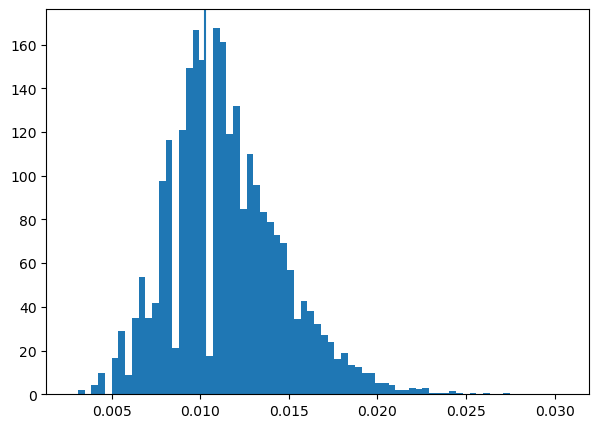

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(7, 5))
prob_standing = np.sum(shooting_standing) / len(shooting_standing)
all_simulated_ = [list(np.random.choice([0, 1], p=[1 - prob_standing, prob_standing],\
     size = len(norm_entropy_standing))) for _ in range(10000)]
all_entropies_ = list(map(norm_entropy, all_simulated_))
ax.axvline(norm_entropy_standing[-1])
counts, edges, _ = ax.hist(all_entropies_, bins='fd', density=True)
bin_centers = 0.5 * (edges[1:] + edges[:-1])
hp_standing = np.sum((counts * np.diff(edges)[0])[bin_centers > norm_entropy_standing[-1]])
plt.show()

In [23]:
N = len(shooting_total)
n = np.sum(shooting_total)
shooting_total += [1]
indices = [i for i, x in enumerate(shooting_total) if x == 1]

indeces_entr = np.array(indices) + 1

x_i_values = np.diff(indeces_entr) / (N + 1)

x_i_values = np.array([indices[0] / (N + 1)] + list(x_i_values))
np.sum(x_i_values)

0.9956896551724139

In [24]:
H = 1 + np.sum(x_i_values * np.log2(x_i_values)) / (np.log2(N + 1))
H

0.0861283889482809